In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

import warnings
warnings.simplefilter('ignore')

In [59]:
school_df = pd.read_csv('../data/cleaned_school.csv')

In [60]:
school_df['district'].unique()

array([ 1,  2,  3,  4,  6,  5,  7, 10,  8,  9, 11, 12, 13, 14, 15, 16, 17,
       19, 18, 22, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 75, 79,
       84])

#### problem noticed... 
There are only 32 districts in NYC... 1-32. 

Entries 75, 79, 84 are wrong and should be cleaned. They were entered incorrectly and instead refer to the school number ie. PS84. 

### Poverty by borough, district etc

In [61]:
school_df['poverty'].describe()

count    8972.000000
mean       75.196790
std        19.584137
min         2.900000
25%        67.600000
50%        80.100000
75%        89.300000
max       100.000000
Name: poverty, dtype: float64

In [62]:
school_df.groupby('borough')['poverty'].mean().sort_values()

borough
R    59.485861
M    68.899832
Q    70.556665
K    76.734346
X    85.256698
Name: poverty, dtype: float64

<Axes: xlabel='borough'>

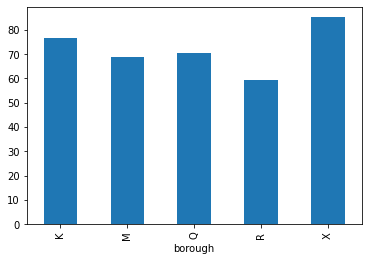

In [64]:
school_df.groupby('borough')['poverty'].mean().plot(kind = 'bar')

In [57]:
school_df.groupby('district')['poverty'].mean().sort_values()

district
26    51.338750
2     55.480308
31    58.235112
15    58.576987
3     59.279821
79    65.734783
25    67.940088
22    69.782500
75    69.920067
28    70.379352
30    70.933750
1     71.051724
21    72.974384
14    73.857895
20    74.197706
24    75.057447
29    75.490435
13    76.182609
27    77.341883
84    77.401192
11    77.701942
18    79.936686
4     80.932051
8     81.305556
17    83.513878
5     84.502759
16    84.651261
6     84.871674
10    85.134895
19    87.327311
32    88.203704
23    89.034483
12    90.158130
9     90.502915
7     91.533333
Name: poverty, dtype: float64

<Axes: xlabel='district'>

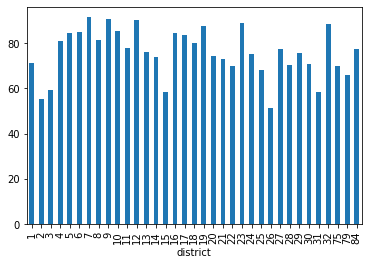

In [63]:
school_df.groupby('district')['poverty'].mean().plot(kind = 'bar')

DBN increases by borough 
* 1-6 is Manhattan
* 8-12 is The Bronx
* 13-23 is Brooklyn
* 24-30 is Queens
* 31 is Staten Island


## Attempt #2 at geolocation data

In [51]:
districts_gdf = gpd.read_file('../data/school_districts.geojson')

In [71]:
districts_gdf.sample(10)


,school_dist,shape_area,shape_leng,geometry
31,27,790724992.452,572076.113562,"MULTIPOLYGON (((-73.83193 40.59345, -73.83117 ..."
32,10,3282963.03108,7883.37166388,"MULTIPOLYGON (((-73.90893 40.87216, -73.90898 ..."
17,22,385611566.706,270190.685308,"MULTIPOLYGON (((-73.91990 40.59960, -73.91996 ..."
30,19,199878614.091,173955.446456,"MULTIPOLYGON (((-73.84674 40.60485, -73.84672 ..."
15,9,82980717.7721,44396.4427326,"MULTIPOLYGON (((-73.93309 40.82823, -73.93307 ..."
27,32,51898318.061,37251.0606877,"MULTIPOLYGON (((-73.91181 40.70343, -73.91290 ..."
5,31,1604156793.41,430016.498898,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
6,4,52620569.229,52062.8830951,"MULTIPOLYGON (((-73.92134 40.80085, -73.92114 ..."
26,16,46763798.9402,35848.9081061,"MULTIPOLYGON (((-73.93312 40.69579, -73.93237 ..."
25,13,104871083.068,86649.0963736,"MULTIPOLYGON (((-73.97906 40.70595, -73.97924 ..."


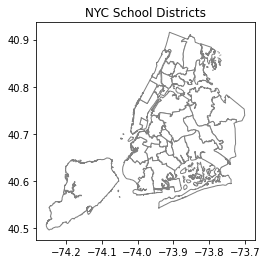

In [69]:
districts_gdf.plot(color='white', edgecolor='gray')
plt.title('NYC School Districts')
plt.show()

## Poverty by school district

In [72]:
poverty_by_district = school_df.groupby('district')['poverty'].mean().reset_index()


In [77]:
poverty_by_district['district'] = poverty_by_district['district'].astype(str)

In [80]:
districts_gdf_pov = districts_gdf.merge(poverty_by_district, left_on="school_dist", right_on="district")

<Axes: >

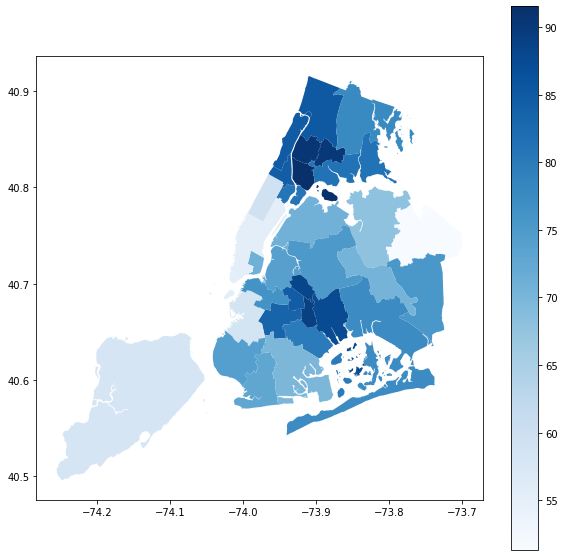

In [87]:
districts_gdf_pov.plot(column = 'poverty', 
                       legend = True, 
                       figsize = (10,10), 
                       cmap = "Blues")

## English Language Learners by school district

<Axes: >

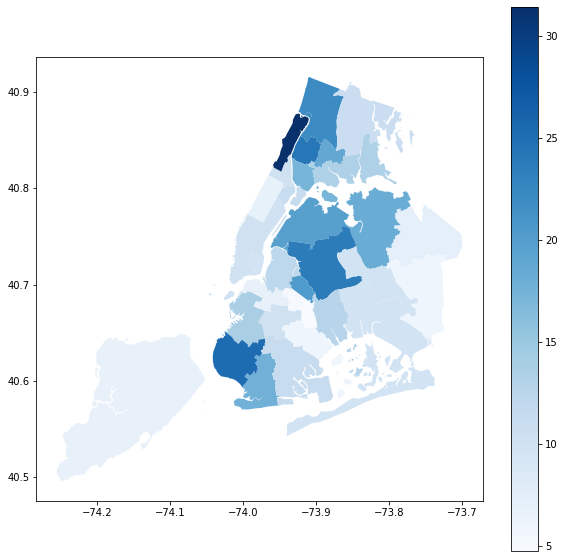

In [93]:
ell_by_district = school_df.groupby('district')['english_language_learner'].mean().reset_index()
ell_by_district['district'] = ell_by_district['district'].astype(str)
districts_gdf_ell = districts_gdf.merge(ell_by_district, left_on="school_dist", right_on="district")
districts_gdf_ell.plot(column = 'english_language_learner', 
                       legend = True, 
                       figsize = (10,10), 
                       cmap = "Blues")

### disability by district

<Axes: >

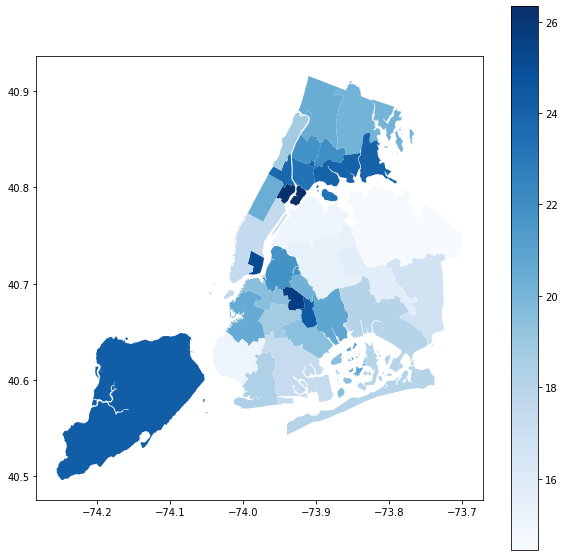

In [94]:
disability_by_district = school_df.groupby('district')['disability'].mean().reset_index()
disability_by_district['district'] = disability_by_district['district'].astype(str)
districts_gdf_disability = districts_gdf.merge(disability_by_district, left_on="school_dist", right_on="district")
districts_gdf_disability.plot(column = 'disability', 
                       legend = True, 
                       figsize = (10,10), 
                       cmap = "Blues")